    Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

In [41]:
import numpy as np
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## Objectivos

1. Buscar un conjunto de datos a analizar:
 - Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas. Ya que también se analizarán.

In [42]:
fichero = pd.read_csv("data/cost-of-living.csv")
fichero.sample(10)

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
2413,2413,Basingstoke,United Kingdom,18.02,69.07,7.21,4.20,4.80,3.34,1.64,...,96.09,920.90,855.84,1621.59,1441.41,NaN,NaN,2582.53,4.00,1
747,747,Ulyanovsk,Russia,8.19,32.75,4.58,1.64,2.46,1.97,1.15,...,158.30,372.58,250.84,684.65,383.27,1282.79,955.27,476.76,8.40,0
4609,4609,Ivdel,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1991,1991,Barreiras,Brazil,2.80,11.18,4.29,0.65,1.49,NaN,0.75,...,74.54,139.75,55.90,279.51,167.70,2515.56,775.16,538.52,15.00,0
2091,2091,Bahawalnagar,Pakistan,0.98,16.04,3.34,1.78,5.35,2.45,0.12,...,28.22,NaN,NaN,NaN,NaN,1198.88,NaN,NaN,14.50,0
3464,3464,Abakaliki,Nigeria,0.68,17.78,NaN,1.07,1.58,2.37,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2500,2500,Nikaia,Greece,8.31,41.55,7.27,1.87,5.19,2.34,1.04,...,114.26,259.67,186.97,363.54,290.84,2077.39,1038.70,597.25,NaN,0
3718,3718,Turkmenbasy,Turkmenistan,14.25,85.47,4.27,2.85,NaN,5.70,2.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
412,412,Gwalior,India,1.84,7.35,3.37,1.53,2.14,0.92,0.31,...,37.95,79.58,55.09,186.70,134.67,740.51,271.12,489.71,9.35,0
4359,4359,Az Zabadani,Syria,3.25,10.00,6.75,1.50,1.50,0.63,0.48,...,35.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.97,0


In [43]:
fichero.info()
#para ver la tipologia de datos, la mayoria son float, menos city y country que son objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4874 non-null   int64  
 1   city          4874 non-null   object 
 2   country       4874 non-null   object 
 3   x1            4449 non-null   float64
 4   x2            4432 non-null   float64
 5   x3            4552 non-null   float64
 6   x4            4385 non-null   float64
 7   x5            4445 non-null   float64
 8   x6            4540 non-null   float64
 9   x7            4438 non-null   float64
 10  x8            4571 non-null   float64
 11  x9            4494 non-null   float64
 12  x10           4457 non-null   float64
 13  x11           4538 non-null   float64
 14  x12           4369 non-null   float64
 15  x13           4393 non-null   float64
 16  x14           4318 non-null   float64
 17  x15           4312 non-null   float64
 18  x16           4509 non-null 

In [44]:
fichero.shape
#tenemos 4874 filas / entradas y 59 columnas.

(4874, 59)

In [45]:
fichero["city"].value_counts()
#Miramos el value count porque queremos intender que es cada entry.
#La conclusion despues de haber mirado el fichero es que cada entry es la respuesta de una persona.
#Tambien hemos averiguado en la pagina web https://www.numbeo.com/cost-of-living/

Victoria     4
Hamilton     3
Toledo       3
Salamanca    3
Cordoba      3
            ..
Green Bay    1
Kharagpur    1
Waitakere    1
Fargo        1
Neiafu       1
Name: city, Length: 4816, dtype: int64

In [46]:
fichero.isnull().sum()
#Aqui hemos averiguado los nulos y nos hemos dado cuenta que hay muchos nulos
# en la categorias de ocio por ejemplo (tennis court, Gym, etc.) o de la compra de un piso.
# y asumimos que no todas la personas tienen la misma capacidad economica para
#comprar un piso o que tengan los mismo gusto de ocio.


Unnamed: 0         0
city               0
country            0
x1               425
x2               442
x3               322
x4               489
x5               429
x6               334
x7               436
x8               303
x9               380
x10              417
x11              336
x12              505
x13              481
x14              556
x15              562
x16              365
x17              375
x18              435
x19              464
x20              430
x21              427
x22              495
x23              384
x24              460
x25              725
x26              651
x27              485
x28             1473
x29             2124
x30              861
x31             1005
x32             1368
x33              578
x34             1035
x35              970
x36              474
x37             1172
x38              340
x39             1351
x40             2366
x41              469
x42             1113
x43             1644
x44              461
x45          

In [47]:
fichero.duplicated().sum()
#no hay duplicados

0

In [48]:
fichero.describe()
#el describe nos devuelve los principales estadisticos de la tabla.

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4874.000000,4449.000000,4432.000000,4552.000000,4385.000000,4445.000000,4540.000000,4438.000000,4571.000000,4494.000000,...,4337.000000,3533.000000,3465.000000,3418.000000,3385.000000,2681.000000,2609.000000,3459.000000,3894.000000,4874.000000
mean,2436.500000,10.321643,43.213592,6.875426,3.376732,3.937287,2.742822,1.513053,1.110768,1.139455,...,85.420108,710.696156,559.472898,1252.427627,973.603867,3207.173025,2323.089766,1817.033501,6.527214,0.186705
std,1407.146936,7.165507,25.365827,2.669017,2.080606,2.088773,1.353734,0.905525,0.749957,0.513458,...,40.328050,650.404203,529.592777,1222.803640,926.552107,6222.564176,3536.720519,1626.482870,5.423472,0.389714
min,0.000000,0.450000,3.250000,1.060000,0.320000,0.310000,0.220000,0.110000,0.070000,0.260000,...,7.570000,21.690000,12.200000,61.200000,27.110000,109.530000,48.010000,18.000000,0.600000,0.000000
25%,1218.250000,4.310000,22.350000,4.910000,1.590000,2.220000,1.560000,0.750000,0.470000,0.820000,...,57.620000,254.440000,168.970000,465.720000,325.920000,1118.030000,778.890000,478.255000,3.000000,0.000000
50%,2436.500000,9.830000,40.000000,6.960000,3.000000,3.640000,2.630000,1.450000,1.040000,1.040000,...,83.100000,519.350000,400.000000,934.000000,720.710000,2077.390000,1558.040000,1298.370000,5.210000,0.000000
75%,3654.750000,15.000000,60.000000,8.500000,5.000000,5.190000,3.722500,2.080000,1.570000,1.300000,...,106.670000,986.760000,791.670000,1700.000000,1367.330000,3782.820000,2796.500000,2742.500000,8.497500,0.000000
max,4873.000000,56.980000,211.350000,21.810000,15.000000,17.500000,10.000000,8.000000,5.770000,6.810000,...,542.740000,12608.830000,8989.370000,27006.110000,17868.180000,237522.540000,79174.180000,12681.260000,61.330000,1.000000


# Añadimos la leyenda del significado de las columnas

- city	Name of the city
- country	Name of the country
- x1	Meal, Inexpensive Restaurant (USD)
- x2	Meal for 2 People, Mid-range Restaurant, Three-course (USD)
- x3	McMeal at McDonalds (or Equivalent Combo Meal) (USD)
- x4	Domestic Beer (0.5 liter draught, in restaurants) (USD)
- x5	Imported Beer (0.33 liter bottle, in restaurants) (USD)
- x6	Cappuccino (regular, in restaurants) (USD)
- x7	Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)
- x8	Water (0.33 liter bottle, in restaurants) (USD)
- x9	Milk (regular), (1 liter) (USD)
- x10	Loaf of Fresh White Bread (500g) (USD)
- x11	Rice (white), (1kg) (USD)
- x12	Eggs (regular) (12) (USD)
- x13	Local Cheese (1kg) (USD)
- x14	Chicken Fillets (1kg) (USD)
- x15	Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)
- x16	Apples (1kg) (USD)
- x17	Banana (1kg) (USD)
- x18	Oranges (1kg) (USD)
- x19	Tomato (1kg) (USD)
- x20	Potato (1kg) (USD)
- x21	Onion (1kg) (USD)
- x22	Lettuce (1 head) (USD)
- x23	Water (1.5 liter bottle, at the market) (USD)
- x24	Bottle of Wine (Mid-Range, at the market) (USD)
- x25	Domestic Beer (0.5 liter bottle, at the market) (USD)
- x26	Imported Beer (0.33 liter bottle, at the market) (USD)
- x27	Cigarettes 20 Pack (Marlboro) (USD)
- x28	One-way Ticket (Local Transport) (USD)
- x29	Monthly Pass (Regular Price) (USD)
- x30	Taxi Start (Normal Tariff) (USD)
- x31	Taxi 1km (Normal Tariff) (USD)
- x32	Taxi 1hour Waiting (Normal Tariff) (USD)
- x33	Gasoline (1 liter) (USD)
- x34	Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)
- x35	Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)
- x36	Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
- x37	1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)
- x38	Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)
- x39	Fitness Club, Monthly Fee for 1 Adult (USD)
- x40	Tennis Court Rent (1 Hour on Weekend) (USD)
- x41	Cinema, International Release, 1 Seat (USD)
- x42	Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)
- x43	International Primary School, Yearly for 1 Child (USD)
- x44	1 Pair of Jeans (Levis 501 Or Similar) (USD)
- x45	1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)
- x46	1 Pair of Nike Running Shoes (Mid-Range) (USD)
- x47	1 Pair of Men Leather Business Shoes (USD)
- x48	Apartment (1 bedroom) in City Centre (USD)
- x49	Apartment (1 bedroom) Outside of Centre (USD)
- x50	Apartment (3 bedrooms) in City Centre (USD)
- x51	Apartment (3 bedrooms) Outside of Centre (USD)
- x52	Price per Square Meter to Buy Apartment in City Centre (USD)
- x53	Price per Square Meter to Buy Apartment Outside of Centre (USD)
- x54	Average Monthly Net Salary (After Tax) (USD)
- x55	Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate
- data_quality	0 if Numbeo considers that more contributors are needed to increase data quality, else 1

2. Extraer los siguentes estadísiticos del conjunto de datos para varias de las variables disponibles:
- Media
- Desviación con respecto de la media
- Varianza
- Desviación típica
- Moda
- Mediana
- Media ponderada
- Robustez
- Coeficiente de variación

In [49]:
# Como vemos que tenemos muchos datos vamos a reducir la tabla a unas cuantas comidas de alimentación, vivienda y sueldo y filtraremos por los 5 paises que tienen más registros en el dataset, que serán:
# United States            1074
# Italy                     185
# India                     167
# Brazil                    166
# United Kingdom            161


fichero_reducido = fichero[["city","country","x9", "x11", "x12", "x14", "x16", "x19", "x48", "x49", "x50", "x51", "x52", "x53", "x54"]]

In [50]:
fichero_reducido = fichero_reducido[(fichero_reducido["country"] == "United States") | (fichero_reducido["country"] == "Italy") | (fichero_reducido["country"] == "India") | (fichero_reducido["country"] == "Brazil") | (fichero_reducido["country"] == "United Kingdom")]

In [51]:
nombres_nuevos = {"city" : "ciudad", "country": "pais","x9": "leche", "x11": "arroz", "x12": "huevos", "x14": "filetes de pollo", "x16": "manzanas", "x19": "tomates", "x48": "Apartamento 1 habitación centro ", "x49":"Apartamento 1 habitación fuera del centro" , "x50": "Apartamento tres habitaciones en centro", "x51": " tres habitaciones fuera centro", "x52":"Precio por metro cuadrado en centro", "x53": "Precio por metro cuadrado fuera centro", "x54":"Salario neto mensual"}

In [52]:
fichero_reducido.rename(columns = nombres_nuevos, inplace=True)

In [53]:
fichero_reducido.head()

,ciudad,pais,leche,arroz,huevos,filetes de pollo,manzanas,tomates,Apartamento 1 habitación centro,Apartamento 1 habitación fuera del centro,Apartamento tres habitaciones en centro,tres habitaciones fuera centro,Precio por metro cuadrado en centro,Precio por metro cuadrado fuera centro,Salario neto mensual
0,Delhi,India,0.73,0.88,1.01,3.79,1.80,0.60,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35
6,Kolkata,India,0.63,0.69,0.91,3.03,1.88,0.64,148.95,84.21,397.89,247.53,1057.12,583.39,536.14
8,Mumbai,India,0.74,0.84,0.97,3.68,2.10,0.59,514.39,285.88,1388.63,681.14,6073.04,2768.67,627.64
14,Sao Paulo,Brazil,1.26,1.18,2.22,4.44,2.04,1.86,552.13,332.00,963.65,669.29,2429.12,1578.94,433.19
20,New York,United States,1.25,7.95,3.93,17.88,5.52,6.22,3851.51,2337.00,7146.84,4365.28,14784.44,9531.27,6066.38


Vamos a basar nuestros ejercicios en la muestra del país de Estados Unidos y sobre la columna de Salario neto:

- Average Monthly Net Salary (After Tax) (USD)

In [54]:
fichero["country"].value_counts()
#utilizamos el Value Count para elegir 5 de los paises que tienen mas registros.

United States            1074
Italy                     185
India                     167
Brazil                    166
United Kingdom            161
                         ... 
Saint Lucia                 1
Sao Tome And Principe       1
Vanuatu                     1
Bermuda                     1
Comoros                     1
Name: country, Length: 204, dtype: int64

In [56]:
#Filtramos los datos por los paises que tienen más entradas y empezaremos por Estados Unidos.

fichero_us = fichero_reducido[fichero_reducido["pais"]== "United States"]
fichero_it = fichero_reducido[fichero_reducido["pais"]== "Italy"]
fichero_in = fichero_reducido[fichero_reducido["pais"]== "India"]
fichero_br = fichero_reducido[fichero_reducido["pais"]== "Brazil"]
fichero_uk = fichero_reducido[fichero_reducido["pais"]== "United Kingdom"]

In [57]:
#media
media_salario_us = round(fichero_us["Salario neto mensual"].mean(),2)
print(f"El salario neto en Estados unidos es de media {media_salario_us}")


El salario neto en Estados unidos es de media 3987.08


In [58]:
#Desviación con respecto de la media

diferencia_us = fichero_us["Salario neto mensual"] - media_salario_us
#calculamos la diferencia entre la columna de salario de US y la media.

desviacion_us = np.abs(diferencia_us)
desviacion_us


20      2079.30
32      1453.61
45       827.40
73       229.62
86       910.63
         ...   
4849        NaN
4850        NaN
4851        NaN
4857        NaN
4858     653.75
Name: Salario neto mensual, Length: 1074, dtype: float64

In [59]:
#Varianza

varianza_us = fichero_us["Salario neto mensual"].var()
varianza_us

2010919.840769498

In [60]:
#Desviación típica

desviacion_tipica_us = fichero_us["Salario neto mensual"].std()
desviacion_tipica_us

1418.0690535970023

In [61]:
#Moda

moda_us = fichero_us["Salario neto mensual"].mode()
moda_us[0]

5000.0

In [62]:
#Mediana
mediana_us = fichero_us["Salario neto mensual"].median()
mediana_us


3750.0

In [ ]:
#Media ponderata
# Para hacer la media ponderada eliminaremos los null.
# Haremos una copia que se llama fichero reducido sin null

In [63]:
# Miramos las entradas para asignar los pesos

fichero_reducido["pais"].value_counts()

United States     1074
Italy              185
India              167
Brazil             166
United Kingdom     161
Name: pais, dtype: int64

In [64]:
# Creamos una columna donde hacemos la relación del peso con los paises

def cat_peso(column): 
    if column == "United States":
        return 1074
    elif column == "Italy":
        return 185
    elif column == "India":
        return 167
    elif column == "Brazil":
        return 166
    else:
        return 161


fichero_reducido["pesos_pais"] = (fichero_reducido["pais"].apply(cat_peso))

In [65]:
# Comprobamos que se ha creado la columna
fichero_reducido.sample()

,ciudad,pais,leche,arroz,huevos,filetes de pollo,manzanas,tomates,Apartamento 1 habitación centro,Apartamento 1 habitación fuera del centro,Apartamento tres habitaciones en centro,tres habitaciones fuera centro,Precio por metro cuadrado en centro,Precio por metro cuadrado fuera centro,Salario neto mensual,pesos_pais
1598,San Bernardino,United States,0.98,4.61,3.5,12.13,3.93,4.23,1637.5,1200.0,2200.0,NaN,2992.37,NaN,2316.0,1074


In [66]:
# Vemos los null, que tenemos 619, y como es una columna de salario decidimos quitarlos en otro df para sacar la media ponderada.

fichero_reducido["Salario neto mensual"].isnull().sum()

619

In [67]:
# Comprobamos las filas que tenemos para comprobar después si se eliminan los nulos
fichero_reducido.shape

(1753, 16)

In [68]:
# Creamos una copia y eliminamos los nulos

fichero_reducido_sin_null = fichero_reducido.copy()

fichero_reducido_sin_null = fichero_reducido_sin_null.dropna(subset= ["Salario neto mensual"])

In [69]:
# Comprobamos que se han eliminado las 619 entradas nulas que teníamos

fichero_reducido_sin_null.shape

(1134, 16)

In [70]:
# Y por fín sacamos la media ponderada

average_fichero_reducido = np.average(fichero_reducido_sin_null["Salario neto mensual"],  weights= fichero_reducido_sin_null["pesos_pais"])
round(average_fichero_reducido,2)

3671.01

In [71]:
# Robustez
# Volvemos a trabajar sobre los datos de Estados Unidos, para simplificar.

robustez = 1/fichero_us.shape[0]
robustez

# Entendemos con este resultado son de datos bastante robustos ya que cuanto más cerca de 0 más robustos son los datos.

0.000931098696461825

In [72]:
# Coeficiente de varación

coeficiente_variacion_us = media_salario_us/desviacion_tipica_us
print(f"El coeficiente de variación es de {round(coeficiente_variacion_us,2)}, con una media de {media_salario_us}")

#Entendemos que es coeficiente positivo porque no se aleja mucho de 0

# Pero La diferencia del coeficiente de variación con la media es de 3984.27 (3987.08 - 2.81  ) que eso si es un valor muy alto, pero no cambia 
# el resultado en dolares

El coeficiente de variación es de 2.81, con una media de 3987.08


In [73]:
# Sacamos también la media de la India y su coeficiente para comprar los resultados y vemos que son menos variados porque su media se acerca y sigue siendo
# un número cercano a 0
fichero_in["Salario neto mensual"].mean()

432.5620661157025

In [74]:
coe_var_in = fichero_in["Salario neto mensual"].mean()/fichero_in["Salario neto mensual"].std()
coe_var_in

2.4999764672192017

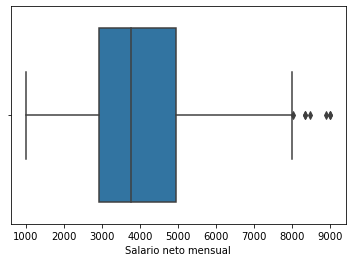

In [75]:
# Para interpretar mejor los resultados hemos decidido visualizar un boxplot.

plt.figure()

fig= sns.boxplot(x="Salario neto mensual", data=fichero_us)


In [76]:
# Hacemos un pequeño resumen de todos los resultados que hemos sacado para verlos en conjunto

print(f"El coeficiente de variación, que hace referencia a la relacción entre la media y desviación, valor bajo de datos son más homogeneos, {round(coeficiente_variacion_us,2)}")

print("---------------------------------------------------------------------------------------------------------------")

print(f"La robustez que es otra medida de desviación es de {round(robustez,5)}. cuanto mayor cantidad de datos hayamos usado para hacer la estadística más robustos serán")

print("---------------------------------------------------------------------------------------------------------------")

print(f"La mediana es el valor del medio, el Q2,que es de {mediana_us} dolares")

print("---------------------------------------------------------------------------------------------------------------")

print(f"La media es de {media_salario_us} dolares")

print("---------------------------------------------------------------------------------------------------------------")

print(f"La moda es el valor que tiene más frecuencia en nuestros datos y es de {moda_us[0]} dolares")

print("---------------------------------------------------------------------------------------------------------------")

print(f"La desviación típica hace referencia a como de dispersos están los valores de los datos con respecto a la media y está en la misma unidad que estamos usando(us dollar) y es de {round(desviacion_tipica_us,2)} dolares")

print("---------------------------------------------------------------------------------------------------------------")

print(f"La varianza nos da una medida de como de dispersos están los datos respecto a la varianza, habría que convertir esta unidad de medida, y es de {round(varianza_us,2)}")


El coeficiente de variación, que hace referencia a la relacción entre la media y desviación, valor bajo de datos son más homogeneos, 2.81
---------------------------------------------------------------------------------------------------------------
La robustez que es otra medida de desviación es de 0.00093. cuanto mayor cantidad de datos hayamos usado para hacer la estadística más robustos serán
---------------------------------------------------------------------------------------------------------------
La mediana es el valor del medio, el Q2,que es de 3750.0 dolares
---------------------------------------------------------------------------------------------------------------
La media es de 3987.08 dolares
---------------------------------------------------------------------------------------------------------------
La moda es el valor que tiene más frecuencia en nuestros datos y es de 5000.0 dolares
----------------------------------------------------------------------------------

3. Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Nuestra idea principal era poder comparar el poder adquisitivo respecto a algunos productos básicos de alimentación y vivienda y además hacer una comparación entre los 5 países que tenían más registros. No obstante por tiempo nos hemos centrado en averiguar los datos estadísticos sobre el salrio del país con más entradas, estados Unidos.

- Sacamos de conclusión que es un país con un sueldo con IQR que va de 3000 a 5000 dolares. 

- Nos llama mucho la atención que la media y la mediana tienen una diferencia entre ellas de poco menos de 200 dolares, como un 5%, con lo cual entendemos los datos son robustos dentro del IQR.

- También nos llama la atención que a pesar de tener unos outliers bastante altos no afectan demasiado a la media y mediana, por lo que deudcimos que son muy pocos para que no afecten a las otras medidas

- Como conclusión sacamos que según los datos de Estados Unidos el sueldo es bastante más alto que la media Española y entendemos que esto es debido a que al ser un país mucho más consumista requiere de sueldos altos para cumplir con ese tipo de sociedad 

In [ ]:
#No hemos podido concluir nuestra idea inicial pero lo dejamos aquí abajo.

Otras columnas que nos parecen interesantes para investigar

La columnas que nos centraremos seran de producto basico:

- x9 = leche (litro)
- x11 = rice (1 kg)
- x12 = eggs (12 ud.)
- x14 = chicken fillets (1 kg)
- x16 = apples (1 kg)
- x19 = tomato (1 kg)

Las columnas de vivienda:

- x48 = Apartment (1 bedroom) in City Centre (USD)
- x49	= Apartment (1 bedroom) Outside of Centre (USD)
- x50	= Apartment (3 bedrooms) in City Centre (USD)
- x51	= Apartment (3 bedrooms) Outside of Centre (USD)
- x52	= Price per Square Meter to Buy Apartment in City Centre (USD)
- x53	= Price per Square Meter to Buy Apartment Outside of Centre (USD)



In [ ]:

salario_it = round(fichero_it["x54"].mean(),2)
print(f"El salario neto en Italy es de media {salario_it}")

salario_in = round(fichero_in["x54"].mean(),2)
print(f"El salario neto en India es de media {salario_in}")

salario_br = round(fichero_br["x54"].mean(),2)
print(f"El salario neto en Brazil es de media {salario_br}")

salario_uk = round(fichero_uk["x54"].mean(),2)
print(f"El salario neto en United Kingdom es de media {salario_uk}")

El salario neto en Italy es de media 1466.23
El salario neto en India es de media 432.56
El salario neto en Brazil es de media 362.87
El salario neto en United Kingdom es de media 2662.26


In [77]:
fichero_reducido.to_csv("archive/coste_vida_reducido.csv")